<a href="https://colab.research.google.com/github/Sidrahsheikh/Mega-Project/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Facial Emotion Recognition

In [1]:
#To install kaggle
!pip install -q kaggle

In [2]:
#To upload file from File Explorer
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sidrasheikh","key":"e007551a09c88d9aa69ab942a9203121"}'}

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [5]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#To list all dataset in kaggle
!kaggle datasets list

ref                                                 title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                  Data Science Job Salaries               7KB  2022-06-15 08:59:12          17386        546  1.0              
aravindas01/monkeypox-cases-countrywise-data        MonkeyPox Cases_Countrywise Data        6KB  2022-08-10 17:12:36            492         25  0.9117647        
faryarmemon/usa-housing-market-factors              U.S. Housing Market Factors            32KB  2022-08-03 02:19:31            398         29  1.0              
zzettrkalpakbal/full-filled-brain-stroke-dataset    Brain stroke prediction dataset        52KB  2022-07-16 09:57:08           1910         59  0.9705882        
himanshunakrani/student-stud

In [7]:
!kaggle datasets download -d msambare/fer2013 #kaggle datasets download -d deadskull7/fer2013 #kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 81% 49.0M/60.3M [00:00<00:00, 176MB/s]
100% 60.3M/60.3M [00:00<00:00, 176MB/s]


In [8]:
# to unzip the file
!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [9]:
#To download all the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

# **Bulding our model to train the data**

In [10]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [11]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [12]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


In [13]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

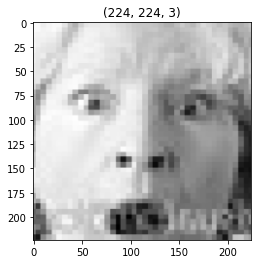

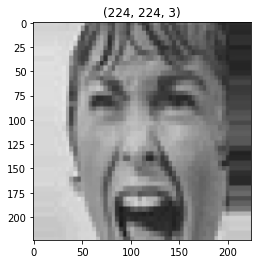

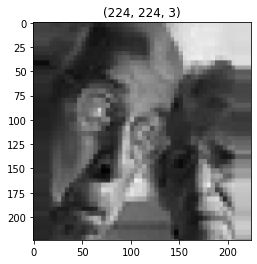

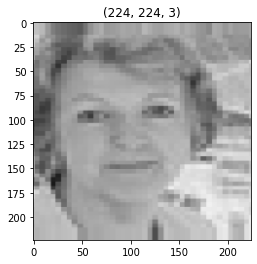

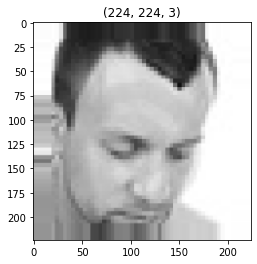

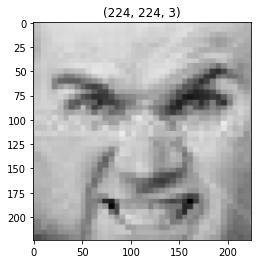

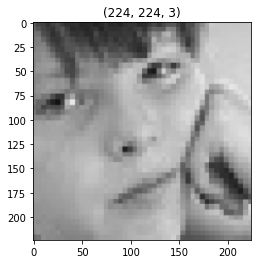

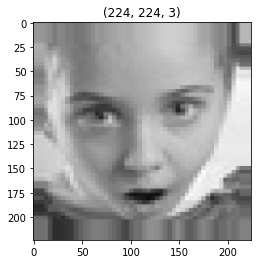

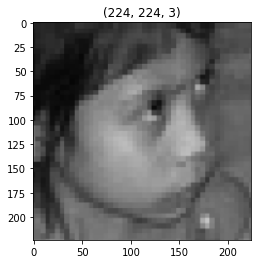

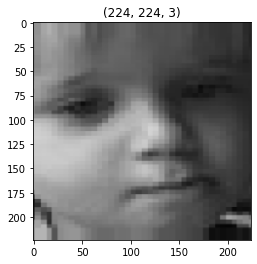

In [14]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [15]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_models.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [16]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 13.6206 - accuracy: 0.1781
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to best_models.h5
10/10 [==============================] - 24s 2s/step - loss: 13.6206 - accuracy: 0.1781 - val_loss: 7.0184 - val_accuracy: 0.4062
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 10.4021 - accuracy: 0.3125
Epoch 2: val_accuracy did not improve from 0.40625
10/10 [==============================] - 21s 2s/step - loss: 10.4021 - accuracy: 0.3125 - val_loss: 4.8231 - val_accuracy: 0.3867
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.1312 - accuracy: 0.3875
Epoch 3: val_accuracy did not improve from 0.40625
10/10 [==============================] - 23s 2s/step - loss: 8.1312 - accuracy: 0.3875 - val_loss: 8.3691 - val_accuracy: 0.3711
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.4976 - accuracy: 0.3844
Epoch 4: val_accuracy improved from 0.40625 to 

In [17]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_models.h5")


In [18]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

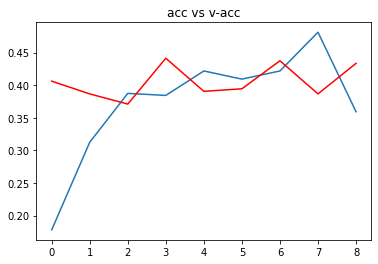

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

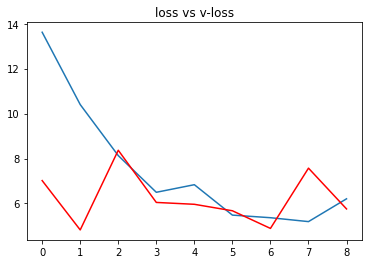

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [22]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of sad


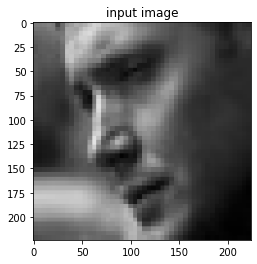

In [23]:
# path for the image to see if it predics correct class

path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()